In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
%matplotlib widget
import matplotlib.pyplot as plt

import logging 
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

from public_tests import *

from autils import *
from lab_utils_softmax import plt_softmax
np.set_printoptions(precision=2)

2025-07-20 20:40:39.385837: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-20 20:40:39.386244: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-20 20:40:39.388590: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-20 20:40:39.394545: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753024239.405016   13242 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753024239.40

E0000 00:00:1753024282.549004   13242 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1753024282.549995   13242 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


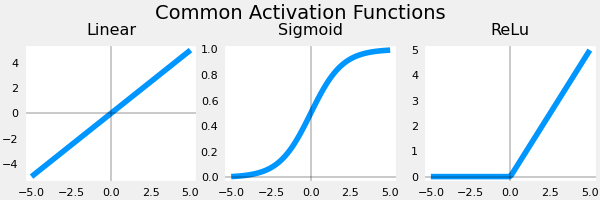

In [2]:
plt_act_trio()

In [3]:
def my_softmax(z):
    ez = np.exp(z)
    a = ez/np.sum(ez)
    return a

In [5]:
z = np.array([1.,2.,3.,4.])
a = my_softmax(z)
atf = tf.nn.softmax(z)
print(f"my_softmax(z): {a}")
print(f"tensorflow softmax(z): {atf}")

test_my_softmax(my_softmax)


my_softmax(z): [0.03 0.09 0.24 0.64]
tensorflow softmax(z): [0.03 0.09 0.24 0.64]
 All tests passed.


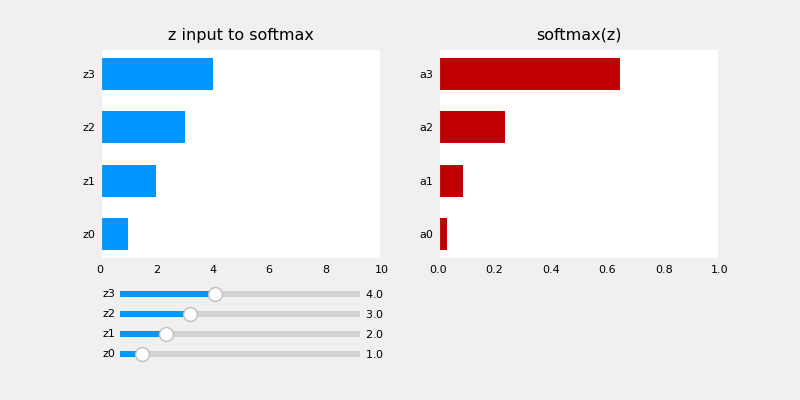

In [6]:
plt.close('all')
plt_softmax(my_softmax)

In [7]:
X,y = load_data()

In [8]:
print('The first element of X is :', X[0])

The first element of X is : [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  8.56e-06  1.94e-06 -7.37e-04
 -8.13e-03 -1.86e-02 -1.87e-02 -1.88e-02 -1.91e-02 -1.64e-02 -3.78e-03
  3.30e-04  1.28e-05  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  1.16e-04  1.20e-04 -1.40e-02 -2.85e-02  8.04e-02
  2.67e-01  2.74e-01  2.79e-01  2.74e-01  2.25e-0

In [11]:
print('The first element of y is:', y[0])
print('the last element of y is:', y[-1,0])

The first element of y is: [0]
the last element of y is: 9


In [13]:
X.shape
y.shape

(5000, 1)

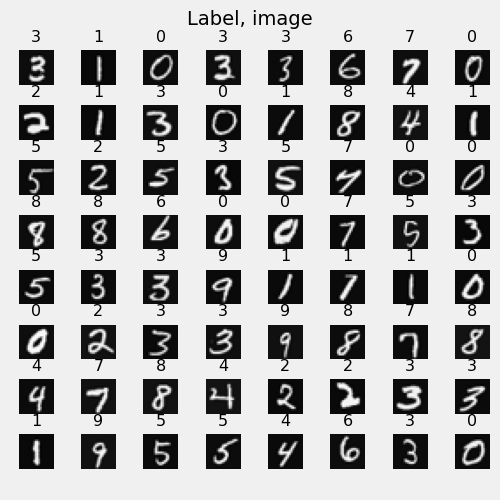

In [14]:
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)

m,n = X.shape

fig,axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13, rect=[0,0.03, 1, 0.91])

widgvis(fig)
for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)

    X_random_reshaped = X[random_index].reshape((20,20)).T

    ax.imshow(X_random_reshaped, cmap='gray')

    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

In [20]:
tf.random.set_seed(1234)
model = Sequential(
    [
        tf.keras.layers.InputLayer((400,)),
        tf.keras.layers.Dense(25, activation='relu', name='L1'),
        tf.keras.layers.Dense(15, activation='relu', name='L2'),
        tf.keras.layers.Dense(10, activation='linear', name='L3')
    ]
)

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 25)             │        10,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L3 (Dense)                      │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,575 (41.31 KB)

 Trainable params: 10,575 (41.31 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
[layer1, layer2, layer3] = model.layers

In [27]:
w1,b1 = layer1.get_weights()
w2,b2 = layer2.get_weights()
w3,b3 = layer3.get_weights()


In [29]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
    optimizer =tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    X,y,
    epochs=40
)

Epoch 1/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 879us/step - loss: 1.9653
Epoch 2/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - loss: 0.7736
Epoch 3/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - loss: 0.5049
Epoch 4/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - loss: 0.4014
Epoch 5/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - loss: 0.3411
Epoch 6/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - loss: 0.3001
Epoch 7/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - loss: 0.2680
Epoch 8/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 854us/step - loss: 0.2436
Epoch 9/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2232  
Epoch 10/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - loss: 0.2057
Epoch 11/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - loss: 0.1900
Epoch 12/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - loss: 0.1761
Epoch 13/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - loss: 0.1639
Epoch 14/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - loss: 0.1527
Epoch 15/40
157/157 ━━━━━━━━━

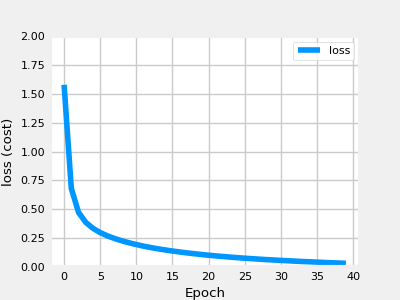

In [30]:
plot_loss_tf(history)

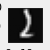

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
predicting a Two: 
[[-11.36   1.5    5.94  -0.97 -16.52 -10.19  -7.8    0.54  -7.62  -3.21]]
largest prediction index: 2


In [31]:
image_of_two = X[1015]
display_digit(image_of_two)

prediction = model.predict(image_of_two.reshape(1,400))

print(f"predicting a Two: \n{prediction}")
print(f"largest prediction index: {np.argmax(prediction)}")

In [32]:
prediction_p = tf.nn.softmax(prediction)

print(f"predicting a Two. Probability vector:\n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

predicting a Two. Probability vector:
[[3.00e-08 1.16e-02 9.83e-01 9.80e-04 1.73e-10 9.71e-08 1.06e-06 4.44e-03
  1.27e-06 1.04e-04]]
Total of predictions: 1.000


In [33]:
yhat = np.argmax(prediction_p)
print(f"np.argmax(prediction_p):{yhat}")

np.argmax(prediction_p):2


In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m,n = X.shape
fig,axes = plt.subplot(8,8)